# EDA time

2018 onwards: https://usa.ipums.org/usa/volii/occ2018.shtml

Up to 2017: https://usa.ipums.org/usa/volii/occ_acs.shtml

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df = pd.read_csv('usa_00004.csv')

In [3]:
df.shape

(207795, 17)

In [4]:
df.head()

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2
0,2021,2017,202103,0,0,99,1,101,2,26,6,5220,9570,45,27632,66578,1
1,2021,2017,202103,0,0,99,11,1114,1,22,6,8990,3980,80,32605,66578,1
2,2021,2017,202103,0,0,99,1,101,2,73,5,0,0,0,9947,22941,0
3,2021,2017,202103,0,0,99,9,901,1,23,6,0,0,0,9726,22941,0
4,2021,2017,202103,0,0,99,9,901,1,19,6,9920,9920,0,1083,22941,0


In [5]:
df.dtypes

YEAR        int64
MULTYEAR    int64
SAMPLE      int64
NCHILD      int64
NCHLT5      int64
ELDCH       int64
RELATE      int64
RELATED     int64
SEX         int64
AGE         int64
MARST       int64
OCC         int64
IND         int64
UHRSWORK    int64
INCTOT      int64
FTOTINC     int64
PWSTATE2    int64
dtype: object

In [6]:
problem_codes = [4465, 3945, 2825, 4960, 726, 630, 4550] #these are duplicates

In [7]:
code = 726

In [8]:
df[df['OCC'] == code].head()

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2
3229,2021,2018,202103,2,0,15,1,101,2,33,6,726,9170,40,95272,102795,2
4425,2021,2017,202103,0,0,99,12,1270,1,18,6,726,7590,12,1216,9999999,4
11196,2021,2017,202103,4,2,14,3,303,2,42,6,726,9160,0,7184,176033,0
14800,2021,2017,202103,0,0,99,2,201,2,56,1,726,8570,45,248961,404963,6
15941,2021,2018,202103,1,1,0,1,101,2,43,1,726,8191,40,253556,320143,6


## Occupation in Groups

In [9]:
def groupings(occ_val):
    if occ_val == 0:
        return "N/A"
    elif 10 <= occ_val<= 440:
        return "Management, Business, Science, and Arts Occupations"
    elif 500 <= occ_val <= 750:
        return "Business Operations Specialists"
    elif 800 <= occ_val <= 950 or occ_val == 960:
        return "Financial Specialists"
    elif 1000 <= occ_val <= 1240:
        return "Computer and Mathematical Occupations"
    elif 1300 <= occ_val <= 1560:
        return "Architecture and Engineering Occupations"
    elif 1600 <= occ_val <= 1965 or occ_val == 1980 or occ_val == 1970:
        return "Life, Physical, and Social Science Occupations"
    elif 2000 <= occ_val <= 2060:
        return "Community and Social Services Occupations"
    elif 2100 <= occ_val <= 2145 or occ_val == 2170 or occ_val == 2180: 
        return "Legal Occupations"
    elif 2200 <= occ_val <= 2550 or occ_val == 2555:
        return "Education, Training, and Library Occupations"
    elif 2600 <= occ_val <= 2920:
        return "Arts, Design, Entertainment, Sports, and Media Occupations"
    elif 3000 <= occ_val <= 3540 or occ_val == 3545 or occ_val == 3550:
        return "Healthcare Practitioners and Technical Occupations"
    elif 3600 <= occ_val <= 3655:
        return "Healthcare Support Occupations"
    elif 3700 <= occ_val <= 3955 or occ_val == 3960:
        return "Protective Service Occupations"
    elif 4000 <= occ_val <= 4150:
        return "Food Preparation and Serving Occupations"
    elif 4200 <= occ_val <= 4250:
        return "Building and Grounds Cleaning and Maintenance Occupations"
    elif 4300 <= occ_val <= 4650 or occ_val == 4251 \
    or occ_val == 4255 or occ_val == 4160 or occ_val == 4252\
    or occ_val == 4655:
        return "Personal Care and Service Occupations"
    elif 4700 <= occ_val <= 4960 or occ_val == 4965:
        return "Sales and Related Occupations"
    elif 5000 <= occ_val <= 5940:
        return "Office and Administrative Support Occupations"
    elif 6000 <= occ_val <= 6130:
        return "Farming, Fishing, and Forestry Occupations"
    elif 6200 <= occ_val <= 6760 or occ_val == 6765:
        return "Construction and Extraction Occupations"
    elif 6800 <= occ_val <= 7610 or occ_val == 7640:
        return "Installation, Maintenance, and Repair Workers"
    elif 7700 <= occ_val <= 8990:
        return "Production Occupations"
    elif 9000 <= occ_val <= 9750 or occ_val == 9760:
        return "Transportation and Material Moving Occupations"
    elif 9800 <= occ_val <= 9920:
        return "Military Specific Occupations"
    else:
        return "Problem"

In [10]:
df['Groups'] = df['OCC'].apply(groupings)
problems = df[df['Groups'] == 'Problem']['OCC']

In [11]:
problems.unique()

array([], dtype=int64)

In [12]:
df.head()

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups
0,2021,2017,202103,0,0,99,1,101,2,26,6,5220,9570,45,27632,66578,1,Office and Administrative Support Occupations
1,2021,2017,202103,0,0,99,11,1114,1,22,6,8990,3980,80,32605,66578,1,Production Occupations
2,2021,2017,202103,0,0,99,1,101,2,73,5,0,0,0,9947,22941,0,N/A
3,2021,2017,202103,0,0,99,9,901,1,23,6,0,0,0,9726,22941,0,N/A
4,2021,2017,202103,0,0,99,9,901,1,19,6,9920,9920,0,1083,22941,0,Military Specific Occupations


### Checking for Nulls

In [13]:
df['ELDCH'] = df['ELDCH'].apply(lambda x: np.nan if x == 99 else x) #there are missing eldest childs

In [14]:
df['RELATE'].unique() #none missing

array([ 1, 11,  9,  3,  2,  4, 10, 12,  7,  6, 13,  5,  8])

In [15]:
df[df['RELATED'] >= 9996] #None: unclassifiable, unknown, illegal, or missing

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups


In [16]:
df['SEX'].unique() #no missing/blank

array([2, 1])

In [17]:
df[df['AGE'] == 999] #no missing ages

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups


In [18]:
df[df['MARST'] == 9] #no missing Marriage Status

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups


In [19]:
df[df['PWSTATE2'] == 0].shape[0] #this is where the place of work is null
    #We need to decide 

113638

In [20]:
df[df['PWSTATE2'] == 99] #None are not reported

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups


In [21]:
us_df = df[(df['PWSTATE2'] > 0) & (df['PWSTATE2'] <= 56)] #only the US states (reported)
us_df.head()

,YEAR,MULTYEAR,SAMPLE,NCHILD,NCHLT5,ELDCH,RELATE,RELATED,SEX,AGE,MARST,OCC,IND,UHRSWORK,INCTOT,FTOTINC,PWSTATE2,Groups
0,2021,2017,202103,0,0,NaN,1,101,2,26,6,5220,9570,45,27632,66578,1,Office and Administrative Support Occupations
1,2021,2017,202103,0,0,NaN,11,1114,1,22,6,8990,3980,80,32605,66578,1,Production Occupations
5,2021,2017,202103,0,0,NaN,1,101,1,27,6,9645,5370,4,7737,7737,1,Transportation and Material Moving Occupations
8,2021,2017,202103,1,1,1.0,3,301,2,25,6,4700,5580,25,10500,22355,1,Sales and Related Occupations
13,2021,2017,202103,0,0,NaN,1,101,1,51,6,5860,7690,48,16579,47642,1,Office and Administrative Support Occupations


In [22]:
df[df['UHRSWORK'] == 0].shape[0] #There are a lot of rows where UHRSWORK is NA

100638

In [23]:
df['UHRSWORK'] = df['UHRSWORK'].apply(lambda x: np.nan if x == 0 else x) #replacing the 0 with NaN values

# What does this stand for??? Not on the codes page.

In [24]:
df['FTOTINC'].unique() #Income???

array([ 66578,  22941,   7737, ...,  57210, 115800, 239400])

In [25]:
df['MULTYEAR'].unique()

array([2017, 2018, 2019, 2020, 2021])

### Exploration

In [26]:
df.columns

Index(['YEAR', 'MULTYEAR', 'SAMPLE', 'NCHILD', 'NCHLT5', 'ELDCH', 'RELATE',
       'RELATED', 'SEX', 'AGE', 'MARST', 'OCC', 'IND', 'UHRSWORK', 'INCTOT',
       'FTOTINC', 'PWSTATE2', 'Groups'],
      dtype='object')

In [27]:
explore = ["UHRSWORK", "NCHILD", "NCHLT5", "ELDCH", "AGE", "YEAR", "FTOTINC"]

In [28]:
df.groupby("SEX")[explore].mean() #1 is male and 2 is female

,UHRSWORK,NCHILD,NCHLT5,ELDCH,AGE,YEAR,FTOTINC
SEX,,,,,,,
1,40.433099,0.434449,0.079909,17.199557,40.816776,2021.0,761222.157388
2,35.474205,0.521495,0.090056,19.475240,43.084960,2021.0,520743.437301


<AxesSubplot:xlabel='FTOTINC', ylabel='Groups'>

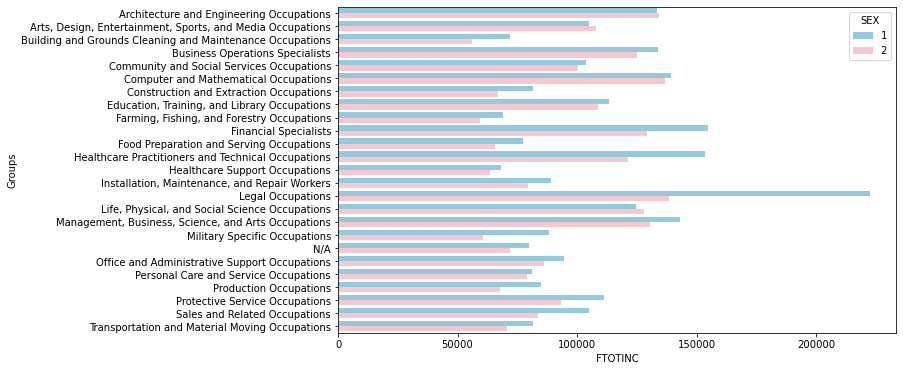

In [29]:
income_medians = df.groupby(["Groups", "SEX"])["FTOTINC"].median().reset_index()
my_palette = {1: "skyblue", 2: "pink"}
plt.figure(figsize=(10, 6))
sns.barplot(data=income_medians, x='FTOTINC', y='Groups', hue='SEX', palette = my_palette)

In [30]:
df["FTOTINC"].describe()

count    2.077950e+05
mean     6.388192e+05
std      2.216082e+06
min     -1.164200e+04
25%      4.542700e+04
50%      8.983700e+04
75%      1.604460e+05
max      9.999999e+06
Name: FTOTINC, dtype: float64

In [31]:
df.groupby("Groups")["FTOTINC"].count()

Groups
Architecture and Engineering Occupations                       2451
Arts, Design, Entertainment, Sports, and Media Occupations     2671
Building and Grounds Cleaning and Maintenance Occupations      3364
Business Operations Specialists                                3998
Community and Social Services Occupations                      2114
Computer and Mathematical Occupations                          3629
Construction and Extraction Occupations                        5632
Education, Training, and Library Occupations                   8232
Farming, Fishing, and Forestry Occupations                     1029
Financial Specialists                                          2577
Food Preparation and Serving Occupations                       6672
Healthcare Practitioners and Technical Occupations             7148
Healthcare Support Occupations                                 3698
Installation, Maintenance, and Repair Workers                  3911
Legal Occupations                        

In [32]:
def isolate_group(group):
    mini = df[df['Groups'] == group]
    plt.figure(figsize=(12, 8))
    
    #We want to know the counts for each -> We will need to get proportions eventually
#     plt.subplot(2, 2, 1)
    print(group)
    sex_cnts = mini.groupby("SEX")['AGE'].count().reset_index()
    sex_cnts.plot(kind = 'bar', x="SEX", y = "AGE", color = ["skyblue", "pink"])
    plt.ylabel("Count")
    plt.show()
    
    #Looking at the counts for how many of each gender is in each income bin
    plt.figure(figsize=(10, 6))
    q1 = mini['FTOTINC'].quantile(0.25)
    q3 = mini['FTOTINC'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    no_outliers = mini[(mini['FTOTINC'] >= lower_bound) & (mini['FTOTINC'] <= upper_bound)]
    male_income = no_outliers[no_outliers["SEX"] == 1]['FTOTINC']
    female_income = no_outliers[no_outliers["SEX"] == 2]['FTOTINC']
    plt.hist(male_income, bins=20, color="skyblue", alpha=0.5, label='Male Income Count')
    plt.hist(female_income, bins=20, color="pink", alpha=0.5, label='Female Income Count')
    plt.legend()
    plt.show()
    
    #Looking at box plot of the two
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 3)
    my_palette = {1: "skyblue", 2: "pink"}
    sns.boxplot(data = mini, x = "FTOTINC", y = "Groups", hue = "SEX",
                palette = my_palette, showfliers = False) #Gets rid of outliers
    plt.legend(loc='upper right')
    plt.show()
    return

In [33]:
groups = df['Groups'].unique()
groups

array(['Office and Administrative Support Occupations',
       'Production Occupations', 'N/A', 'Military Specific Occupations',
       'Transportation and Material Moving Occupations',
       'Personal Care and Service Occupations',
       'Sales and Related Occupations',
       'Food Preparation and Serving Occupations',
       'Protective Service Occupations',
       'Construction and Extraction Occupations',
       'Architecture and Engineering Occupations',
       'Community and Social Services Occupations',
       'Management, Business, Science, and Arts Occupations',
       'Healthcare Support Occupations', 'Financial Specialists',
       'Business Operations Specialists',
       'Installation, Maintenance, and Repair Workers',
       'Farming, Fishing, and Forestry Occupations',
       'Life, Physical, and Social Science Occupations',
       'Healthcare Practitioners and Technical Occupations',
       'Education, Training, and Library Occupations',
       'Building and Grounds 

In [36]:
# isolate_group(groups[1])

Office and Administrative Support Occupations


<Figure size 864x576 with 0 Axes>

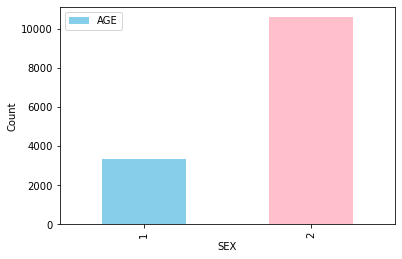

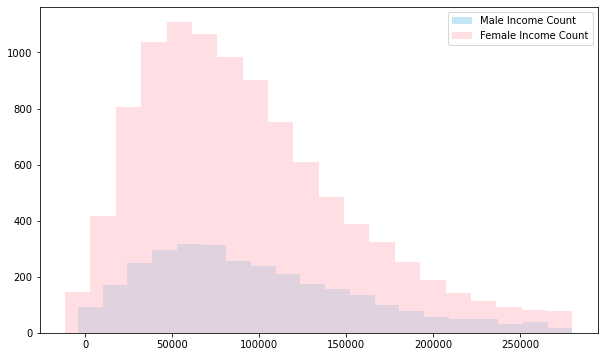

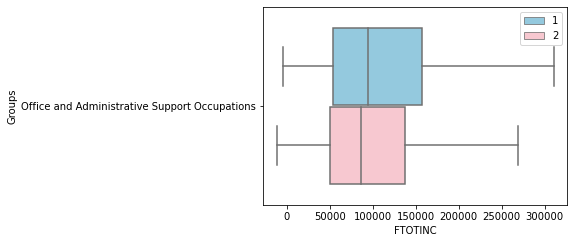

-------------------------------------------------------------------------------------------------------------------------------
Production Occupations


<Figure size 864x576 with 0 Axes>

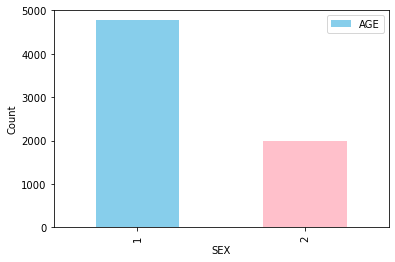

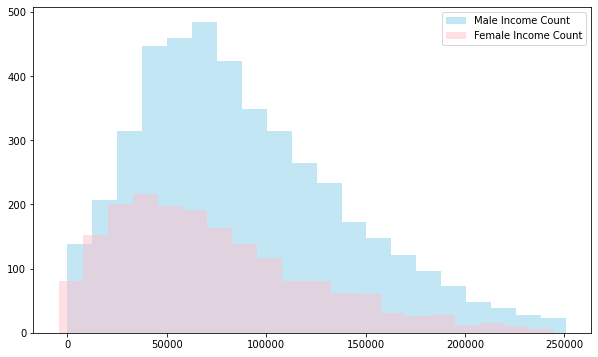

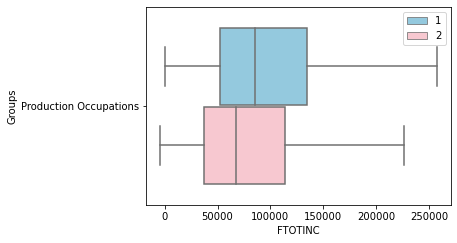

-------------------------------------------------------------------------------------------------------------------------------
Military Specific Occupations


<Figure size 864x576 with 0 Axes>

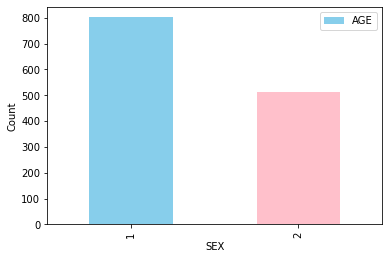

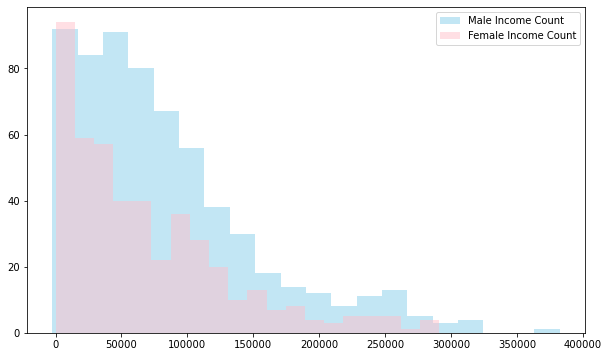

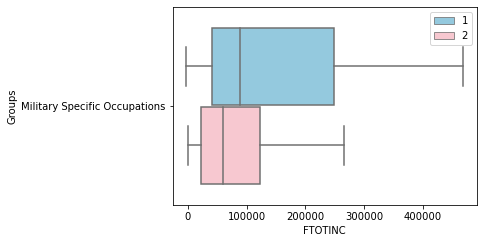

-------------------------------------------------------------------------------------------------------------------------------
Transportation and Material Moving Occupations


<Figure size 864x576 with 0 Axes>

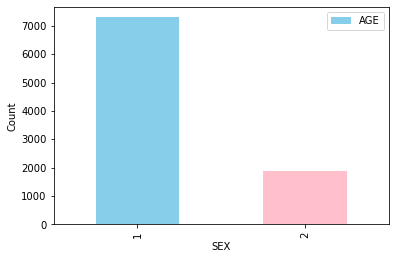

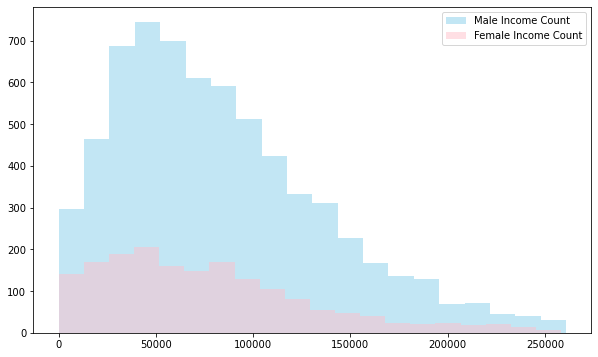

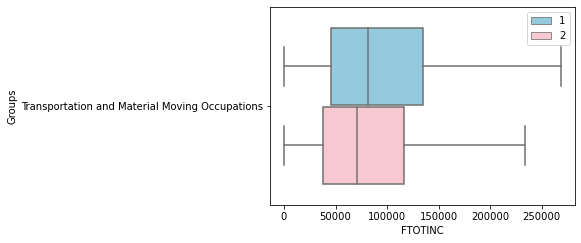

-------------------------------------------------------------------------------------------------------------------------------
Personal Care and Service Occupations


<Figure size 864x576 with 0 Axes>

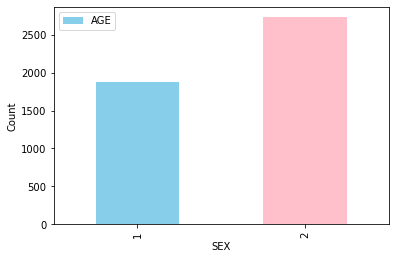

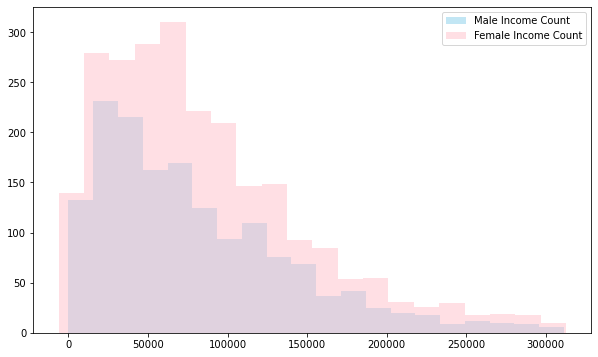

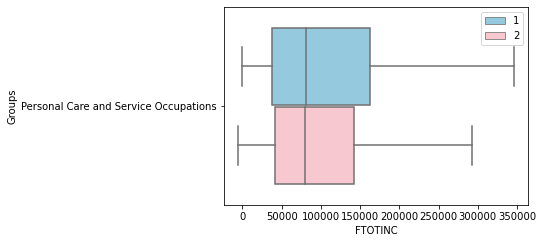

-------------------------------------------------------------------------------------------------------------------------------
Sales and Related Occupations


<Figure size 864x576 with 0 Axes>

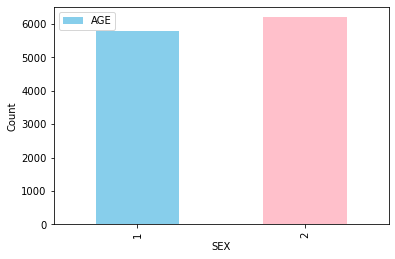

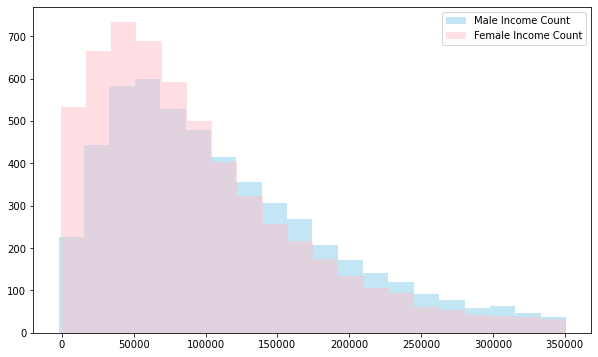

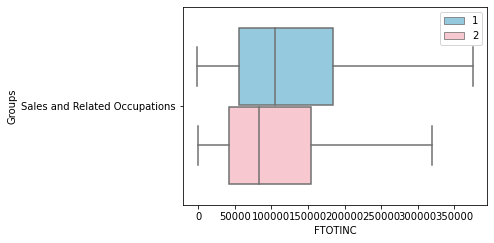

-------------------------------------------------------------------------------------------------------------------------------
Food Preparation and Serving Occupations


<Figure size 864x576 with 0 Axes>

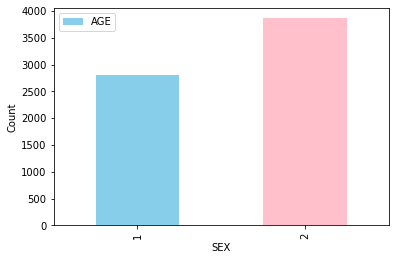

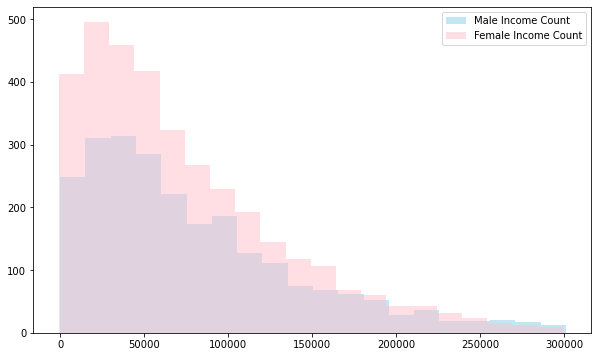

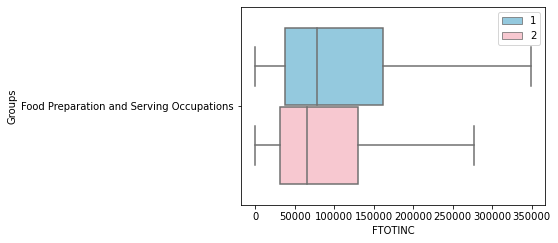

-------------------------------------------------------------------------------------------------------------------------------
Protective Service Occupations


<Figure size 864x576 with 0 Axes>

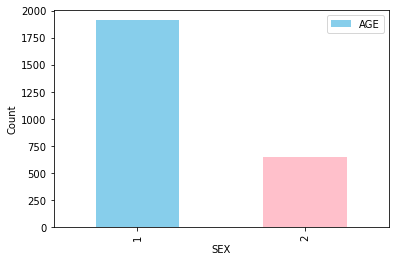

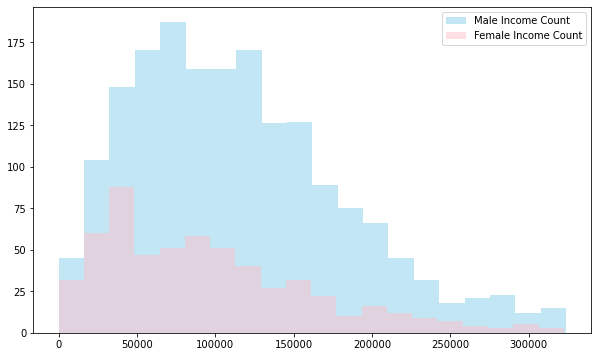

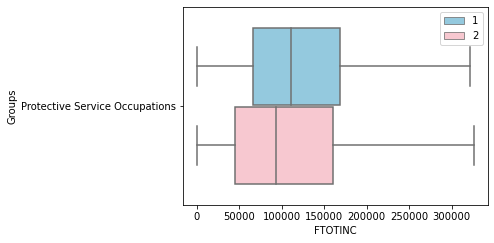

-------------------------------------------------------------------------------------------------------------------------------
Construction and Extraction Occupations


<Figure size 864x576 with 0 Axes>

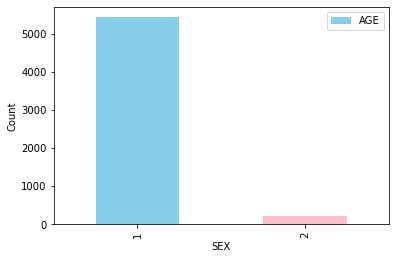

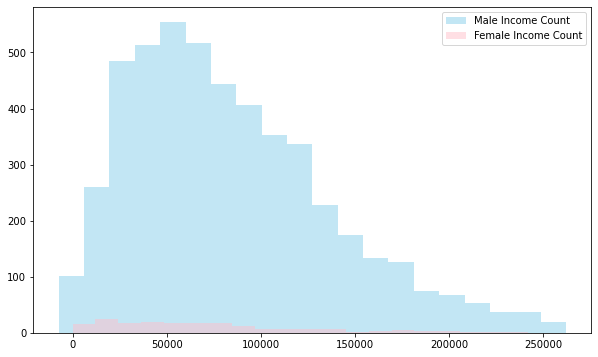

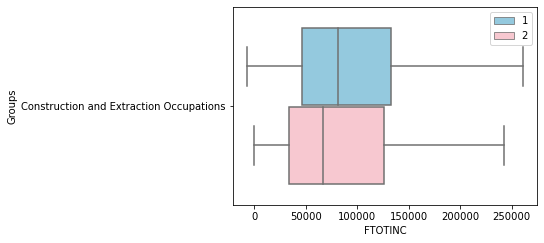

-------------------------------------------------------------------------------------------------------------------------------
Architecture and Engineering Occupations


<Figure size 864x576 with 0 Axes>

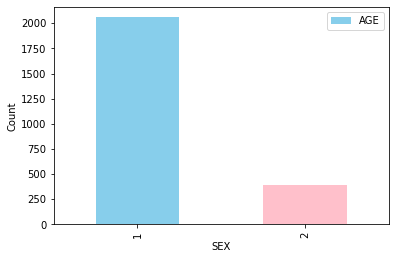

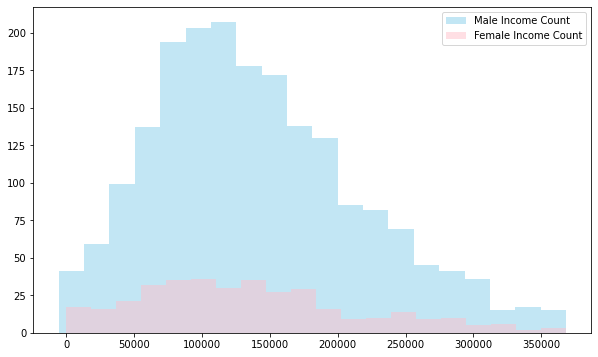

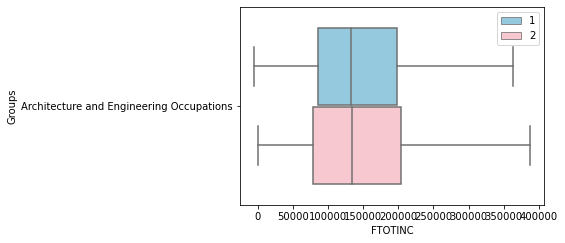

-------------------------------------------------------------------------------------------------------------------------------
Community and Social Services Occupations


<Figure size 864x576 with 0 Axes>

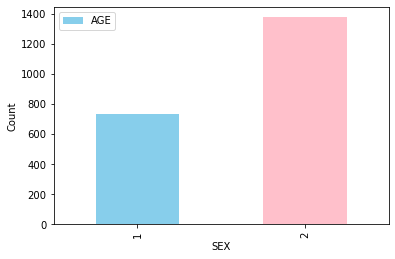

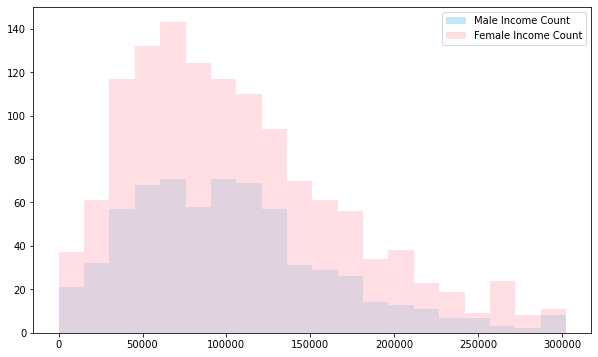

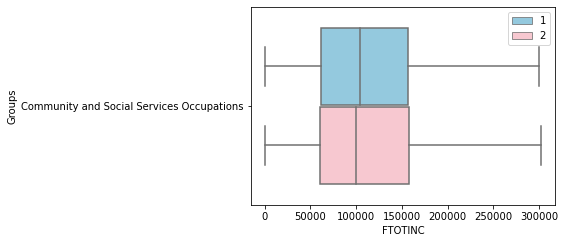

-------------------------------------------------------------------------------------------------------------------------------
Management, Business, Science, and Arts Occupations


<Figure size 864x576 with 0 Axes>

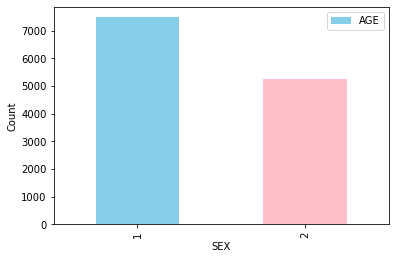

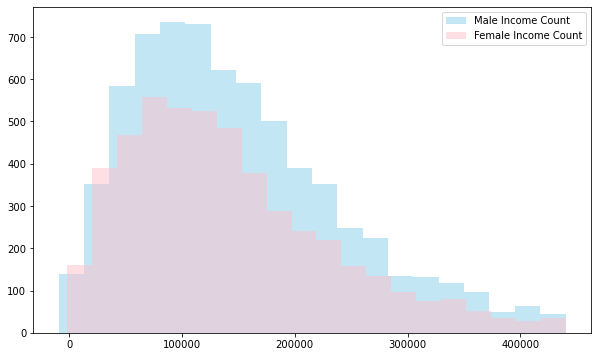

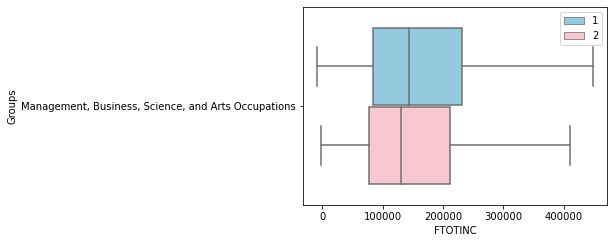

-------------------------------------------------------------------------------------------------------------------------------
Healthcare Support Occupations


<Figure size 864x576 with 0 Axes>

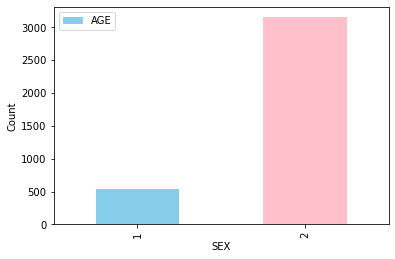

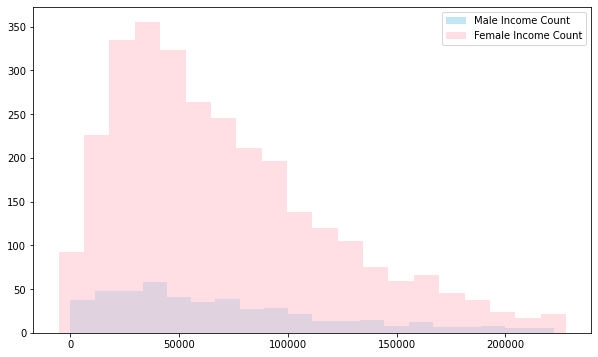

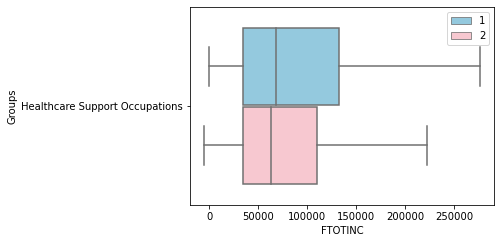

-------------------------------------------------------------------------------------------------------------------------------
Financial Specialists


<Figure size 864x576 with 0 Axes>

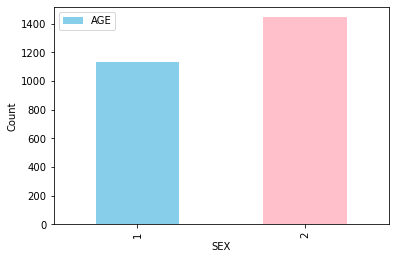

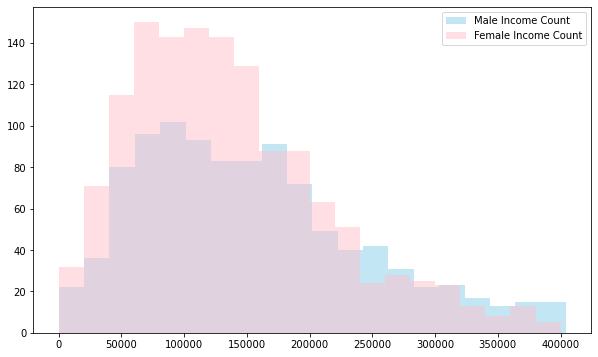

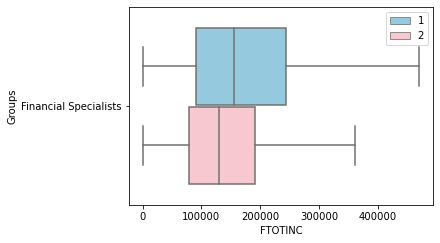

-------------------------------------------------------------------------------------------------------------------------------
Business Operations Specialists


<Figure size 864x576 with 0 Axes>

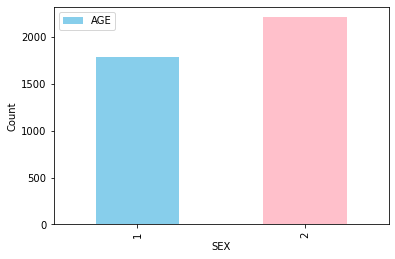

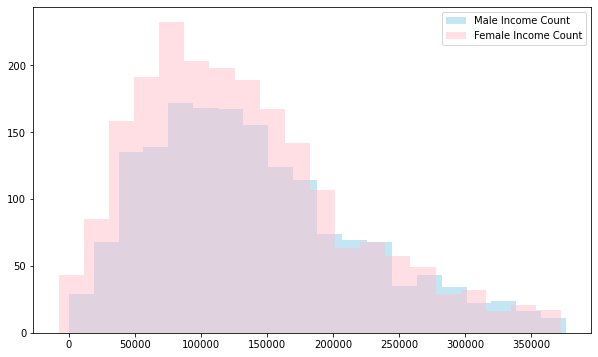

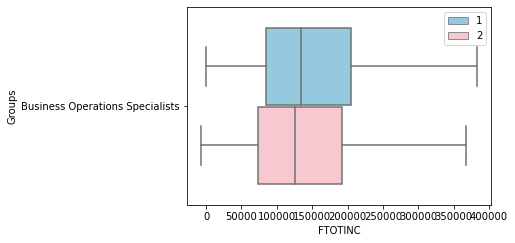

-------------------------------------------------------------------------------------------------------------------------------
Installation, Maintenance, and Repair Workers


<Figure size 864x576 with 0 Axes>

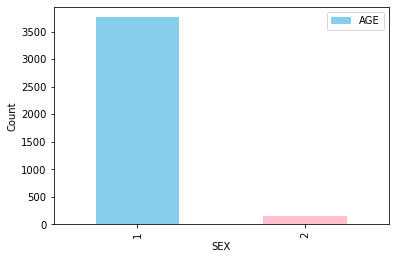

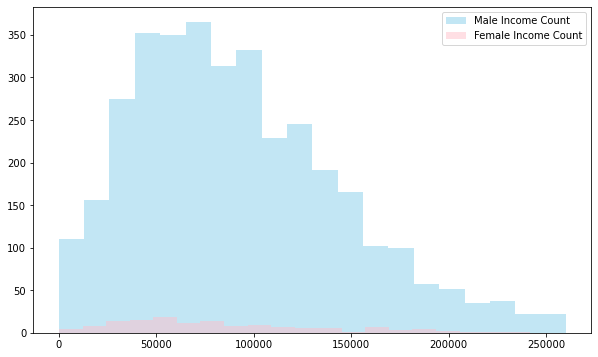

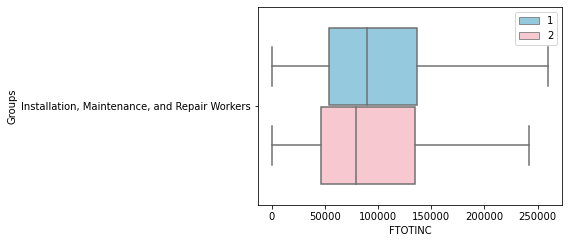

-------------------------------------------------------------------------------------------------------------------------------
Farming, Fishing, and Forestry Occupations


<Figure size 864x576 with 0 Axes>

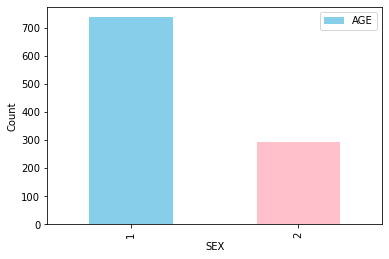

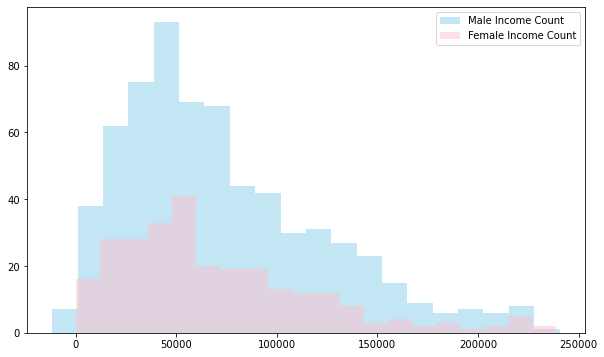

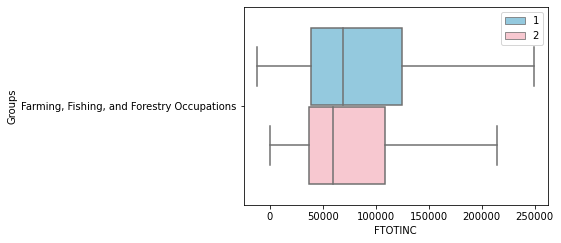

-------------------------------------------------------------------------------------------------------------------------------
Life, Physical, and Social Science Occupations


<Figure size 864x576 with 0 Axes>

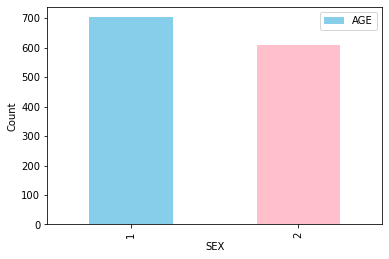

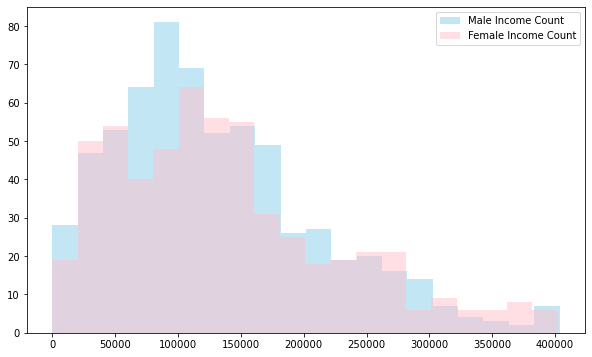

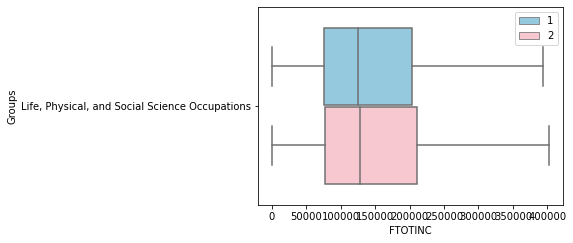

-------------------------------------------------------------------------------------------------------------------------------
Healthcare Practitioners and Technical Occupations


<Figure size 864x576 with 0 Axes>

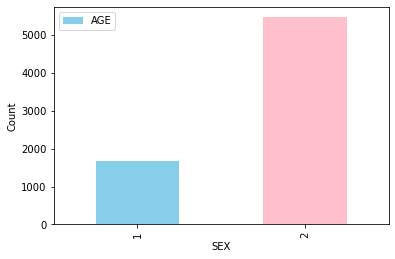

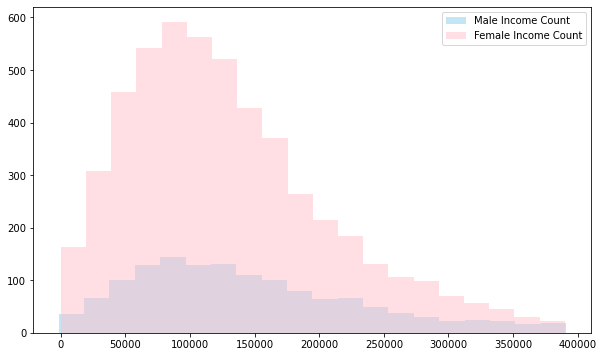

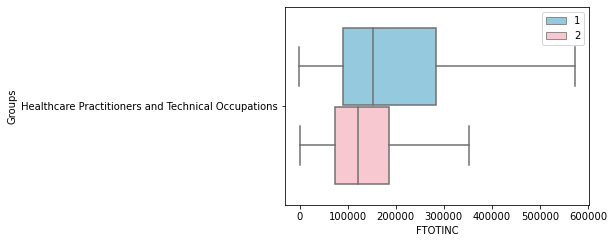

-------------------------------------------------------------------------------------------------------------------------------
Education, Training, and Library Occupations


<Figure size 864x576 with 0 Axes>

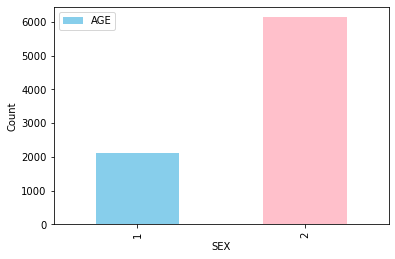

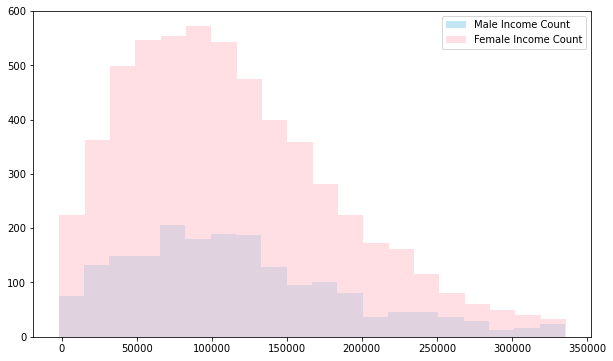

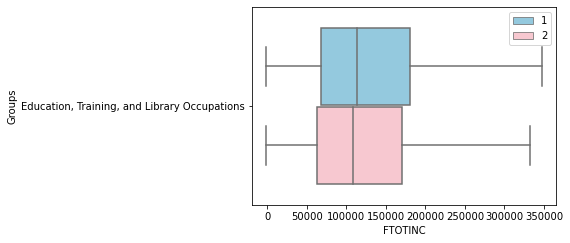

-------------------------------------------------------------------------------------------------------------------------------
Building and Grounds Cleaning and Maintenance Occupations


<Figure size 864x576 with 0 Axes>

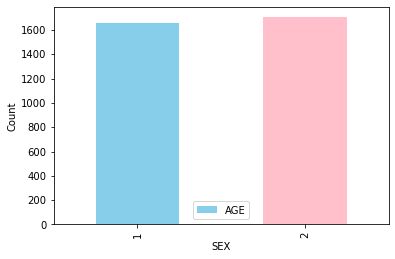

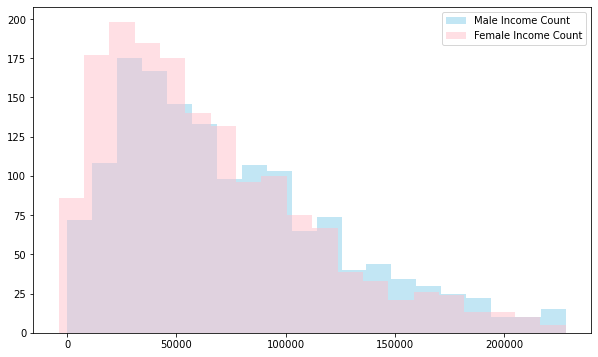

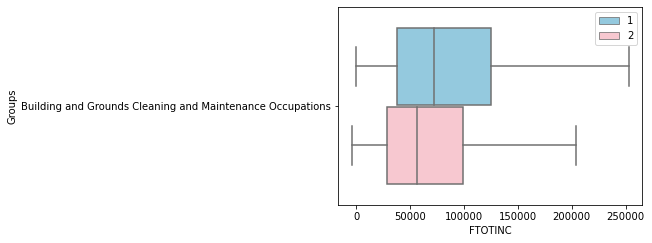

-------------------------------------------------------------------------------------------------------------------------------
Legal Occupations


<Figure size 864x576 with 0 Axes>

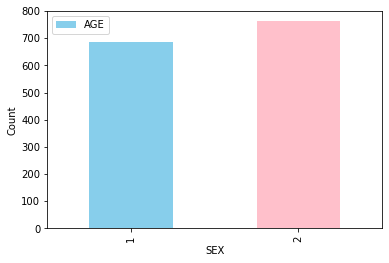

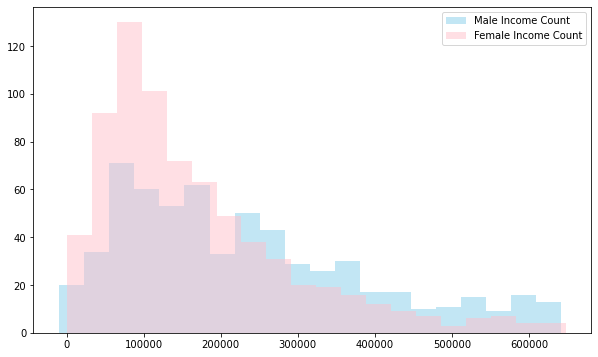

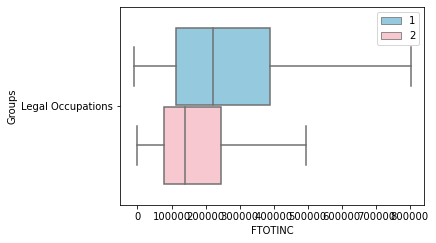

-------------------------------------------------------------------------------------------------------------------------------
Computer and Mathematical Occupations


<Figure size 864x576 with 0 Axes>

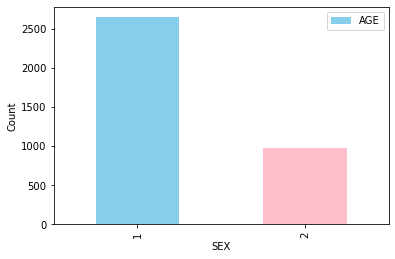

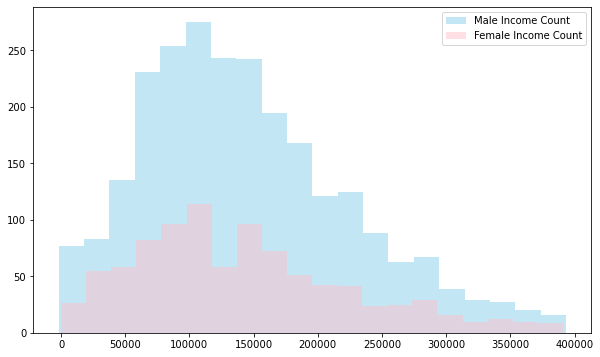

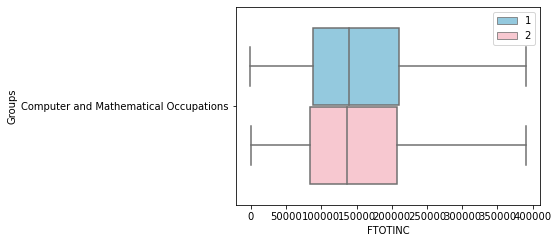

-------------------------------------------------------------------------------------------------------------------------------
Arts, Design, Entertainment, Sports, and Media Occupations


<Figure size 864x576 with 0 Axes>

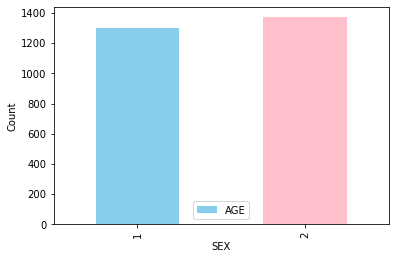

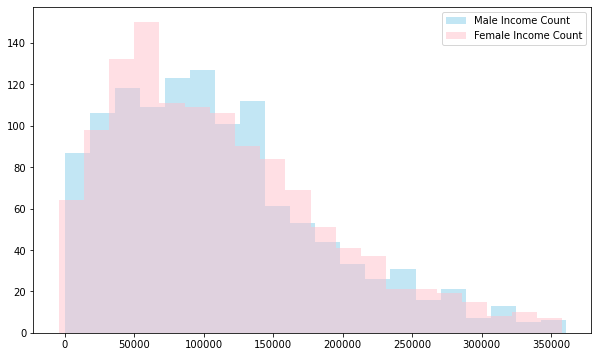

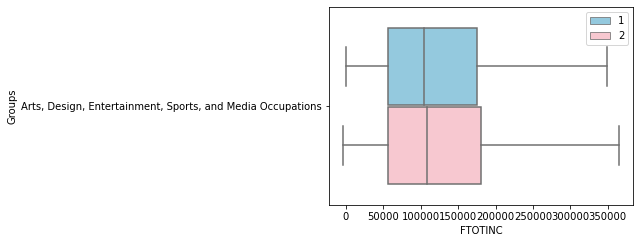

-------------------------------------------------------------------------------------------------------------------------------


In [38]:
for group in groups:
    if group == "N/A":
        continue
    isolate_group(group)
    print("-------------------------------------------------------------------------------------------------------------------------------")